In [2]:
# Import Dependencies

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from pathlib import Path

In [3]:
# Read in cleaned data from csv

crime_data_csv = Path("../../chicago_crimes_all_cleaned_final.csv")

crime_df = pd.read_csv(crime_data_csv)

crime_df

,Case Number,Date,Block,Primary Type,Description,District,Ward,Year,Latitude,Longitude,Location,Population,Zipcode
0,JC104662,12/31/2018 11:59:00 PM,112XX S SACRAMENTO AVE,MINOR PROPERTY CRIME,TO VEHICLE,22,19.0,2018,41.689079,-87.696064,"(41.689078832, -87.696064026)",28804.0,60655.0
1,JC100043,12/31/2018 11:57:00 PM,084XX S SANGAMON ST,MINOR PROPERTY CRIME,TO PROPERTY,6,21.0,2018,41.740521,-87.647391,"(41.740520866, -87.647390719)",68096.0,60620.0
2,JC100006,12/31/2018 11:56:00 PM,018XX S ALLPORT ST,ASSAULT & BATTERY,AGG: HANDS/FIST/FEET NO/MINOR INJURY,12,25.0,2018,41.857068,-87.657625,"(41.857068095, -87.657625201)",79205.0,60608.0
3,JC100031,12/31/2018 11:55:00 PM,078XX S SANGAMON ST,ASSAULT & BATTERY,DOMESTIC BATTERY SIMPLE,6,17.0,2018,41.751914,-87.647717,"(41.75191443, -87.647716532)",68096.0,60620.0
4,JC100026,12/31/2018 11:49:00 PM,052XX W GLADYS AVE,ASSAULT & BATTERY,AGGRAVATED - HANDGUN,15,29.0,2018,41.875684,-87.760479,"(41.87568438, -87.760479356)",47712.0,60644.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1145665,JF420379,9/16/2022 13:48,026XX N NARRAGANSETT AVE,THEFT (ALL TYPES),RETAIL THEFT,25,36.0,2022,41.928077,-87.785606,"(41.928076536, -87.785606186)",41309.0,60707.0
1145666,JF420478,9/1/2022 5:00,005XX W SURF ST,OTHER MINOR CRIMES,HARASSMENT BY TELEPHONE,19,44.0,2022,41.934305,-87.641485,"(41.934304581, -87.641484982)",72113.0,60657.0
1145667,JF420319,7/8/2022 0:00,114XX S PRAIRIE AVE,THEFT (ALL TYPES),FRAUD OR CONFIDENCE GAME,5,9.0,2022,41.685544,-87.616813,"(41.685543881, -87.616812541)",64489.0,60628.0
1145668,JF420102,9/27/2022 11:00,023XX E 70TH ST,THEFT (ALL TYPES),OVER $500,3,5.0,2022,41.768068,-87.567453,"(41.768068052, -87.567452932)",48973.0,60649.0


In [4]:
# crime_df = crime_df.astype({"Year" : object})

In [5]:
# Calculate crimes per year

crime_df["Year"].value_counts().sort_index

<bound method Series.sort_index of 2018    258966
2019    254518
2022    228855
2020    204271
2021    199060
Name: Year, dtype: int64>

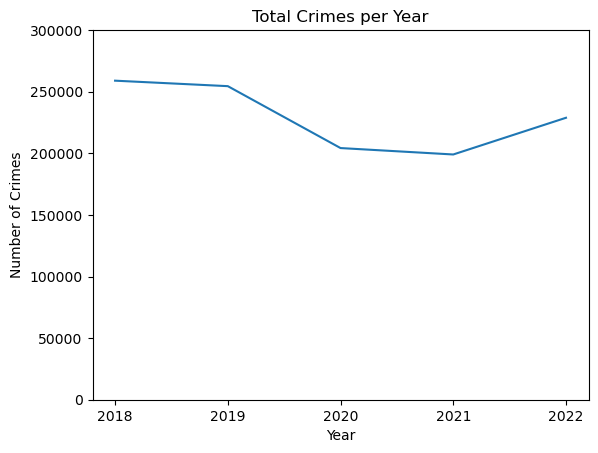

In [6]:
# Display total crimes per year

x_axis = crime_df["Year"].unique()
y_axis = crime_df["Year"].value_counts().sort_index()
plt.xticks(x_axis)
plt.title("Total Crimes per Year")
plt.xlabel("Year")
plt.ylabel("Number of Crimes")
plt.plot(x_axis, y_axis)
plt.ylim(0, 300000)

plt.savefig("Images/total.png")

In [7]:
# Create data frame grouped by type of crime and year

grouped_df = crime_df.groupby(["Primary Type", "Year"])[["Case Number"]].count().sort_values(by = ["Primary Type", "Year"], ascending = True)

# Display grouped data frame

grouped_df


Case Number
Primary Type                     Year             
ARSON                            2018          368
                                 2019          365
                                 2020          574
                                 2021          518
                                 2022          412
ASSAULT & BATTERY                2018        69401
                                 2019        69502
                                 2020        59087
                                 2021        60130
                                 2022        60979
DRUG RELATED                     2018        12696
                                 2019        14894
                                 2020         7227
                                 2021         4064
                                 2022         3938
HOMICIDE                         2018          598
                                 2019          499
                                 2020          789
                                 2021          804
                                 2022          716
KIDNAPPING AND HUMAN TRAFFICKING 2018          177
                                 2019          182
                                 2020          122
                                 2021           93
                                 2022          129
MINOR PROPERTY CRIME             2018        34041
                                 2019        32907
                                 2020        28405
                                 2021        27735
                                 2022        30540
NON-CRIMINAL (SUBJECT SPECIFIED) 2018            3
OFFENSE INVOLVING CHILDREN       2018         2152
                                 2019         2302
                                 2020         1835
                                 2021         1727
                                 2022         1775
OTHER MINOR CRIMES               2018        20614
                                 2019        20649
                                 2020        14572
                                 2021        14621
                                 2022        15613
SEXUAL RELATED CRIME             2018         2577
                                 2019         2846
                                 2020         2002
                                 2021         2386
                                 2022         2590
THEFT (ALL TYPES)                2018       110811
                                 2019       103874
                                 2020        81198
                                 2021        77976
                                 2022       103398
WEAPONS RELATED CRIME            2018         5528
                                 2019         6498
                                 2020         8460
                                 2021         9006
                                 2022         8765

In [8]:
# Set variables for the count of each type of crime by year

years = crime_df["Year"].unique()
theft_counts = grouped_df.iloc[46:51, 0]
assault_counts = grouped_df.iloc[5:10, 0]
property_counts = property_counts = grouped_df.iloc[25:30, 0]
minor_counts = grouped_df.iloc[36:41, 0]
drug_counts = grouped_df.iloc[10:15, 0]
weapons_counts = grouped_df.iloc[51:56, 0]
sexual_counts = grouped_df.iloc[41:46, 0]
children_counts = children_counts = grouped_df.iloc[31:36, 0]
homicide_counts = grouped_df.iloc[15:20, 0]
arson_counts = grouped_df.iloc[0:5, 0]
kidnapping_counts = grouped_df.iloc[20:25, 0]


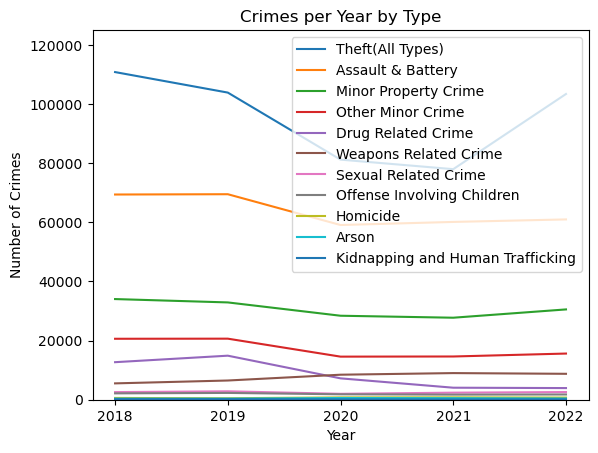

In [9]:
# Plot all types of crime by year

plt.plot(years, theft_counts, label="Theft(All Types)")
plt.plot(years, assault_counts, label="Assault & Battery")
plt.plot(years, property_counts, label="Minor Property Crime")
plt.plot(years, minor_counts, label="Other Minor Crime")
plt.plot(years, drug_counts, label="Drug Related Crime")
plt.plot(years, weapons_counts, label="Weapons Related Crime")
plt.plot(years, sexual_counts, label="Sexual Related Crime")
plt.plot(years, children_counts, label="Offense Involving Children")
plt.plot(years, homicide_counts, label="Homicide")
plt.plot(years, arson_counts, label="Arson")
plt.plot(years, kidnapping_counts, label="Kidnapping and Human Trafficking")
plt.xticks(years)
plt.title("Crimes per Year by Type")
plt.xlabel("Year")
plt.ylabel("Number of Crimes")
plt.ylim(0, 125000)
plt.legend(loc="best")
plt.savefig("Images/all_types.png")
plt.show()


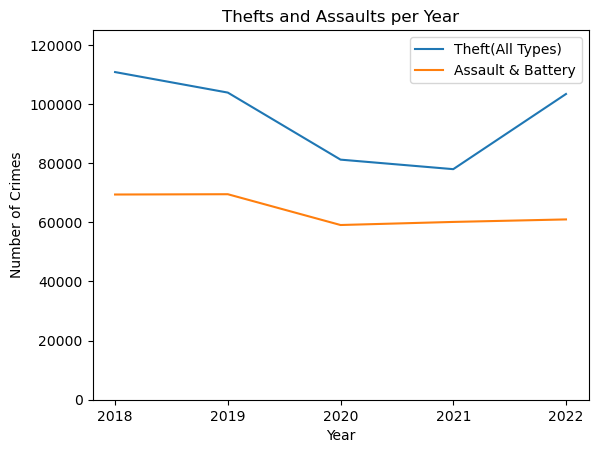

In [10]:
# Plot most common types of crime by year

plt.plot(years, theft_counts, label="Theft(All Types)")
plt.plot(years, assault_counts, label="Assault & Battery")
plt.xticks(years)
plt.title("Thefts and Assaults per Year")
plt.xlabel("Year")
plt.ylabel("Number of Crimes")
plt.ylim(0, 125000)
plt.legend(loc="best")
plt.savefig("Images/most_common.png")
plt.show()

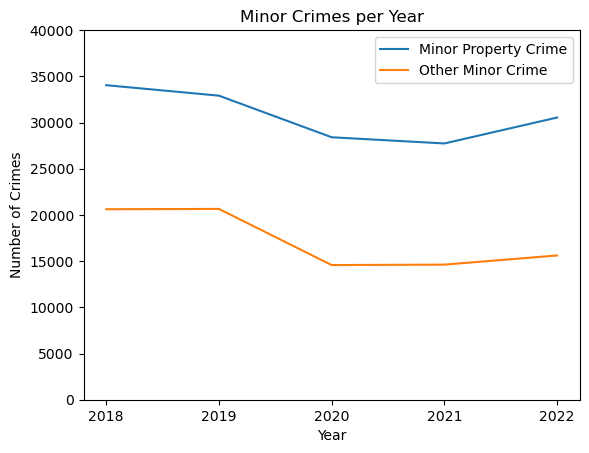

In [11]:
# Plot minor types of crime by year

plt.plot(years, property_counts, label="Minor Property Crime")
plt.plot(years, minor_counts, label="Other Minor Crime")
plt.xticks(years)
plt.title("Minor Crimes per Year")
plt.xlabel("Year")
plt.ylabel("Number of Crimes")
plt.ylim(0, 40000)
plt.legend(loc="best")
plt.savefig("Images/minor.png")
plt.show()

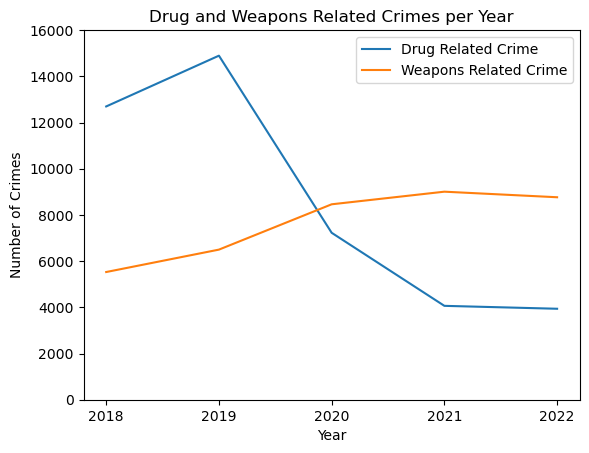

In [14]:
# Plot drug and weapons crime by year

plt.plot(years, drug_counts, label="Drug Related Crime")
plt.plot(years, weapons_counts, label="Weapons Related Crime")
plt.xticks(years)
plt.title("Drug and Weapons Related Crimes per Year")
plt.xlabel("Year")
plt.ylabel("Number of Crimes")
plt.ylim(0, 16000)
plt.legend(loc="best")
plt.savefig("Images/drugs_weapons.png")
plt.show()

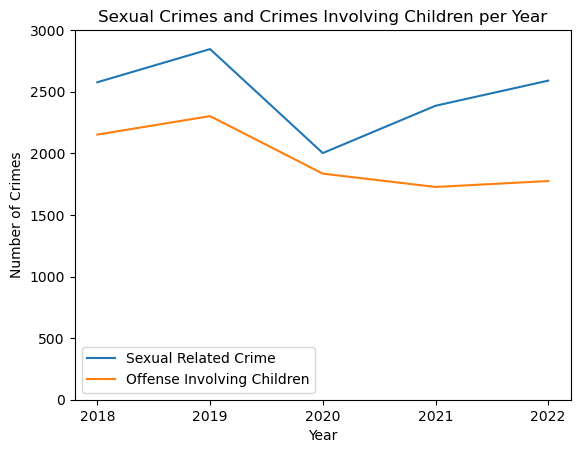

In [12]:
# Plot other types of crime by year

plt.plot(years, sexual_counts, label="Sexual Related Crime")
plt.plot(years, children_counts, label="Offense Involving Children")
plt.xticks(years)
plt.title("Sexual Crimes and Crimes Involving Children per Year")
plt.xlabel("Year")
plt.ylabel("Number of Crimes")
plt.ylim(0, 3000)
plt.legend(loc="best")
plt.savefig("Images/other.png")
plt.show()

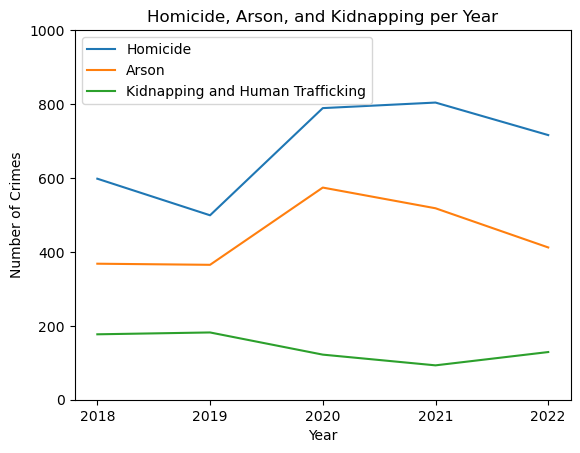

In [19]:
# Plot least common types of crime

plt.plot(years, homicide_counts, label="Homicide")
plt.plot(years, arson_counts, label="Arson")
plt.plot(years, kidnapping_counts, label="Kidnapping and Human Trafficking")
plt.xticks(years)
plt.title("Homicide, Arson, and Kidnapping per Year")
plt.xlabel("Year")
plt.ylabel("Number of Crimes")
plt.ylim(0, 1000)
plt.legend(loc="best")
plt.savefig("Images/least_common.png")
plt.show()

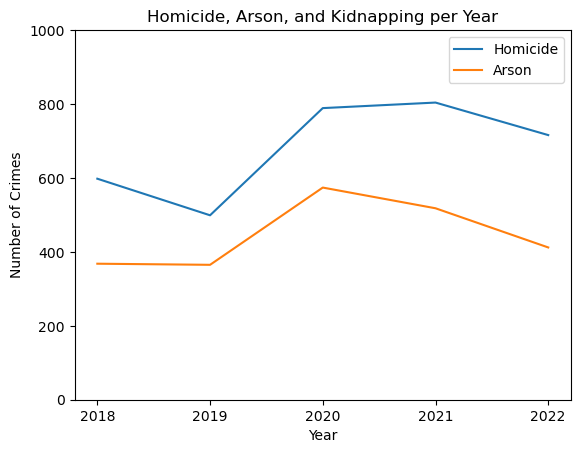

In [29]:
# Plot just homicide and arson
plt.plot(years, homicide_counts, label="Homicide")
plt.plot(years, arson_counts, label="Arson")
plt.xticks(years)
plt.title("Homicide, Arson, and Kidnapping per Year")
plt.xlabel("Year")
plt.ylabel("Number of Crimes")
plt.ylim(0, 1000)
plt.legend(loc="best")
plt.savefig("Images/homicide_arson.png")
plt.show()

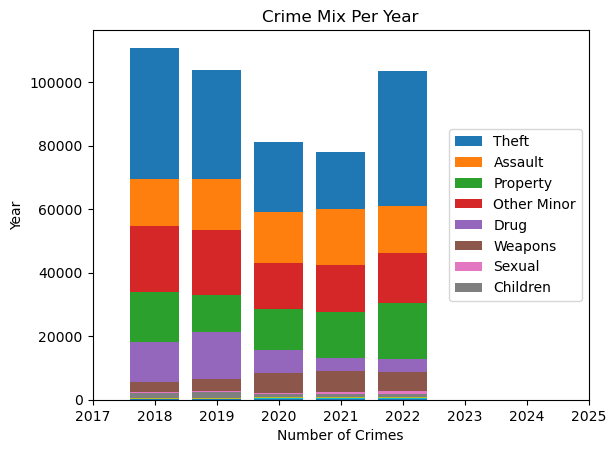

In [14]:
# Create stacked bar chart with crime types by year

plt.bar(years, theft_counts, label = "Theft")
plt.bar(years, assault_counts, label = "Assault")
plt.bar(years, property_counts, label = "Property")
plt.bar(years, minor_counts, bottom = property_counts, label = "Other Minor")
plt.bar(years, drug_counts, bottom = weapons_counts, label = "Drug")
plt.bar(years, weapons_counts, label= "Weapons")
plt.bar(years, sexual_counts, label = "Sexual")
plt.bar(years, children_counts, label = "Children")
plt.bar(years, homicide_counts)
plt.bar(years, arson_counts)
plt.bar(years, kidnapping_counts)
plt.xlim(2017, 2025)  
plt.legend(loc="right")
plt.title("Crime Mix Per Year")
plt.xlabel("Number of Crimes")
plt.ylabel("Year")
plt.savefig("Images/stacked_bar.png")
plt.show()

In [15]:
# Create new data frame with the totals by category by year

year_totals = pd.crosstab(index=crime_df['Year'], columns=crime_df['Primary Type'])

# Clean new data frame to put in same order as above bar chart

year_totals = year_totals[["THEFT (ALL TYPES)", "ASSAULT & BATTERY", "MINOR PROPERTY CRIME", "OTHER MINOR CRIMES", "DRUG RELATED", "WEAPONS RELATED CRIME",
                                     "SEXUAL RELATED CRIME", "OFFENSE INVOLVING CHILDREN", "HOMICIDE", "ARSON", "KIDNAPPING AND HUMAN TRAFFICKING"]]

year_totals

Primary Type,THEFT (ALL TYPES),ASSAULT & BATTERY,MINOR PROPERTY CRIME,OTHER MINOR CRIMES,DRUG RELATED,WEAPONS RELATED CRIME,SEXUAL RELATED CRIME,OFFENSE INVOLVING CHILDREN,HOMICIDE,ARSON,KIDNAPPING AND HUMAN TRAFFICKING
Year,,,,,,,,,,,
2018,110811,69401,34041,20614,12696,5528,2577,2152,598,368,177
2019,103874,69502,32907,20649,14894,6498,2846,2302,499,365,182
2020,81198,59087,28405,14572,7227,8460,2002,1835,789,574,122
2021,77976,60130,27735,14621,4064,9006,2386,1727,804,518,93
2022,103398,60979,30540,15613,3938,8765,2590,1775,716,412,129


In [16]:
# Reduce data frame to plot percentages of most common crimes

year_totals_reduced = year_totals[["THEFT (ALL TYPES)", "ASSAULT & BATTERY", "MINOR PROPERTY CRIME", "OTHER MINOR CRIMES"]]
year_totals_reduced

Primary Type,THEFT (ALL TYPES),ASSAULT & BATTERY,MINOR PROPERTY CRIME,OTHER MINOR CRIMES
Year,,,,
2018,110811,69401,34041,20614
2019,103874,69502,32907,20649
2020,81198,59087,28405,14572
2021,77976,60130,27735,14621
2022,103398,60979,30540,15613


In [17]:
# Create new data frame with the proportion by category by year

year_proportions = pd.crosstab(index=crime_df['Year'], columns=crime_df['Primary Type'], normalize="index")

# Clean new data frame to put in same order as above bar chart

year_proportions = year_proportions[["THEFT (ALL TYPES)", "ASSAULT & BATTERY", "MINOR PROPERTY CRIME", "OTHER MINOR CRIMES", "DRUG RELATED", "WEAPONS RELATED CRIME",
                                     "SEXUAL RELATED CRIME", "OFFENSE INVOLVING CHILDREN", "HOMICIDE", "ARSON", "KIDNAPPING AND HUMAN TRAFFICKING"]]
year_proportions

Primary Type,THEFT (ALL TYPES),ASSAULT & BATTERY,MINOR PROPERTY CRIME,OTHER MINOR CRIMES,DRUG RELATED,WEAPONS RELATED CRIME,SEXUAL RELATED CRIME,OFFENSE INVOLVING CHILDREN,HOMICIDE,ARSON,KIDNAPPING AND HUMAN TRAFFICKING
Year,,,,,,,,,,,
2018,0.427898,0.267993,0.131450,0.079601,0.049026,0.021346,0.009951,0.008310,0.002309,0.001421,0.000683
2019,0.408120,0.273073,0.129291,0.081130,0.058518,0.025531,0.011182,0.009045,0.001961,0.001434,0.000715
2020,0.397501,0.289258,0.139055,0.071337,0.035379,0.041416,0.009801,0.008983,0.003863,0.002810,0.000597
2021,0.391721,0.302070,0.139330,0.073450,0.020416,0.045243,0.011986,0.008676,0.004039,0.002602,0.000467
2022,0.451806,0.266453,0.133447,0.068222,0.017207,0.038299,0.011317,0.007756,0.003129,0.001800,0.000564


In [18]:
# Reduce data frame to plot percentages of most common crimes

year_proportions_reduced = year_proportions[["THEFT (ALL TYPES)", "ASSAULT & BATTERY", "MINOR PROPERTY CRIME", "OTHER MINOR CRIMES"]]

year_proportions_reduced


Primary Type,THEFT (ALL TYPES),ASSAULT & BATTERY,MINOR PROPERTY CRIME,OTHER MINOR CRIMES
Year,,,,
2018,0.427898,0.267993,0.131450,0.079601
2019,0.408120,0.273073,0.129291,0.081130
2020,0.397501,0.289258,0.139055,0.071337
2021,0.391721,0.302070,0.139330,0.073450
2022,0.451806,0.266453,0.133447,0.068222


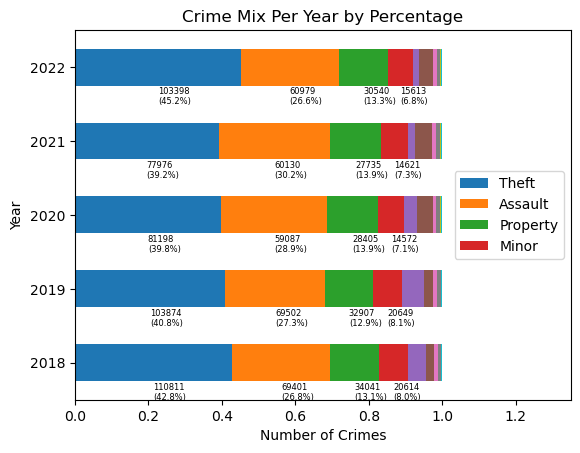

In [19]:
# Graph crime mix as a percentage of the total

year_proportions.plot(kind="barh", stacked=True)
for n, x in enumerate([*year_totals_reduced.index.values]):
    for (proportion, count, y_loc) in zip(year_proportions_reduced.loc[x],
                                          year_totals_reduced.loc[x],
                                          year_proportions_reduced.loc[x].cumsum()):
                
        plt.text(x=(y_loc - proportion) + (proportion / 2),
                 y=n - 0.5,
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 fontsize=6)
plt.xlim(0, 1.35)  
plt.legend(["Theft", "Assault", "Property", "Minor"], loc="right")
plt.title("Crime Mix Per Year by Percentage")
plt.xlabel("Number of Crimes")
plt.ylabel("Year")
plt.savefig("Images/percentage_bar.png")

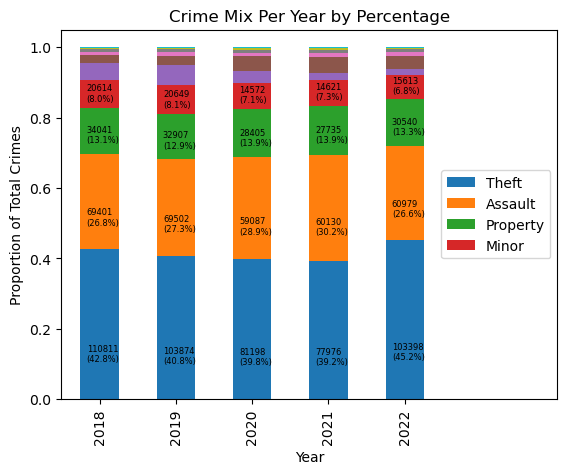

In [30]:
# Verical version of above chart

year_proportions.plot(kind="bar", stacked=True)
for n, x in enumerate([*year_totals_reduced.index.values]):
    for (proportion, count, y_loc) in zip(year_proportions_reduced.loc[x],
                                          year_totals_reduced.loc[x],
                                          year_proportions_reduced.loc[x].cumsum()):
                
        plt.text(x=n - 0.17,
                 y=(y_loc - proportion) + (proportion / 4),
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)',
                 fontsize=6)
plt.xlim(-.5, 6)  
plt.legend(["Theft", "Assault", "Property", "Minor"], loc="right")
plt.title("Crime Mix Per Year by Percentage")
plt.xlabel("Year")
plt.ylabel("Proportion of Total Crimes")
plt.savefig("Images/percentage_bar_vert.png")

In [21]:
# Calculate % change over the entire time frame for each category

year_cat = year_totals = pd.crosstab(index=crime_df['Primary Type'], columns=crime_df['Year'])
year_cat["Total"] = crime_df["Primary Type"].value_counts()
year_cat["Change 2018-2022"] = year_cat[2022] - year_cat[2018]
year_cat["% Change 2018-2022"] = (year_cat["Change 2018-2022"] / year_cat[2018]) * 100
year_cat = year_cat.drop(index = "NON-CRIMINAL (SUBJECT SPECIFIED)")

year_cat

Year,2018,2019,2020,2021,2022,Total,Change 2018-2022,% Change 2018-2022
Primary Type,,,,,,,,
ARSON,368,365,574,518,412,2237,44,11.956522
ASSAULT & BATTERY,69401,69502,59087,60130,60979,319099,-8422,-12.135272
DRUG RELATED,12696,14894,7227,4064,3938,42819,-8758,-68.982357
HOMICIDE,598,499,789,804,716,3406,118,19.732441
KIDNAPPING AND HUMAN TRAFFICKING,177,182,122,93,129,703,-48,-27.118644
MINOR PROPERTY CRIME,34041,32907,28405,27735,30540,153628,-3501,-10.284657
OFFENSE INVOLVING CHILDREN,2152,2302,1835,1727,1775,9791,-377,-17.518587
OTHER MINOR CRIMES,20614,20649,14572,14621,15613,86069,-5001,-24.260212
SEXUAL RELATED CRIME,2577,2846,2002,2386,2590,12401,13,0.504463


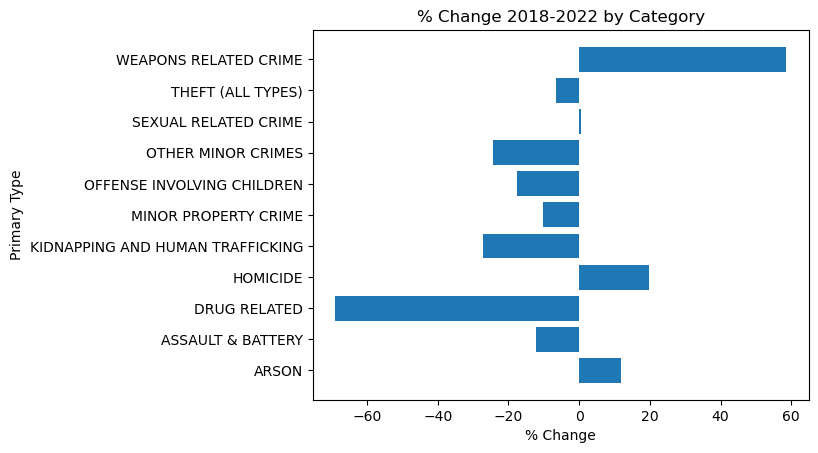

In [22]:
# Plot % change over the entire time frame for each category

types = year_cat.index
change = year_cat["% Change 2018-2022"]

plt.barh(types, change)
plt.title("% Change 2018-2022 by Category")
plt.xlabel("% Change")
plt.ylabel("Primary Type")
plt.savefig("Images/percent_change_cat.png")
plt.show()

In [27]:
# Calculate change in total crime for each year

year_change = year_cat.append(crime_df["Year"].value_counts())
year_change["2019"] = ((year_change[2019] - year_change[2018]) / year_change[2018]) * 100
year_change["2020"] = ((year_change[2020] - year_change[2019]) / year_change[2019]) * 100
year_change["2021"] = ((year_change[2021] - year_change[2020]) / year_change[2020]) * 100
year_change["2022"] = ((year_change[2022] - year_change[2021]) / year_change[2021]) * 100
year_change["Total Change"] = ((year_change[2022] - year_change[2018]) / year_change[2018]) * 100
year_change = year_change[["2019", "2020", "2021", "2022", "Total Change"]]
year_change


Year,2019,2020,2021,2022,Total Change
Primary Type,,,,,
ARSON,-0.815217,57.260274,-9.756098,-20.463320,11.956522
ASSAULT & BATTERY,0.145531,-14.985180,1.765194,1.411941,-12.135272
DRUG RELATED,17.312539,-51.477105,-43.766431,-3.100394,-68.982357
HOMICIDE,-16.555184,58.116232,1.901141,-10.945274,19.732441
KIDNAPPING AND HUMAN TRAFFICKING,2.824859,-32.967033,-23.770492,38.709677,-27.118644
MINOR PROPERTY CRIME,-3.331277,-13.680980,-2.358740,10.113575,-10.284657
OFFENSE INVOLVING CHILDREN,6.970260,-20.286707,-5.885559,2.779386,-17.518587
OTHER MINOR CRIMES,0.169788,-29.429997,0.336261,6.784762,-24.260212
SEXUAL RELATED CRIME,10.438494,-29.655657,19.180819,8.549874,0.504463


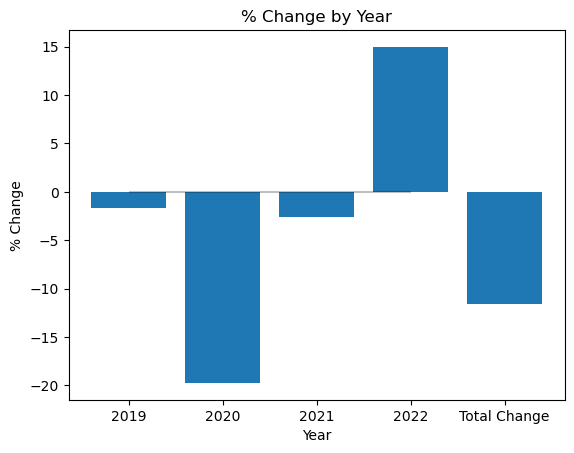

In [28]:
# Plot change in total crime for each year

changes = year_change.iloc[11, :]
x_axis = year_change.columns

plt.bar(x_axis, changes)
plt.title("% Change by Year")
plt.xlabel("Year")
plt.ylabel("% Change")
plt.hlines(0, 0 , 3, alpha=0.25)
plt.savefig("Images/percent_change_total.png")
plt.show()
